In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
# import packages
import pandas as pd #importing data and data handling
import matplotlib.pyplot as plt #importing matplotlib for plotting
import seaborn as sns #importing seaborn library for easier plotting
import numpy as np #some data tronsformations

In [68]:
# reading data
spotify_data = pd.read_csv("/content/drive/MyDrive/Capstone/TikTokSpotifyMerged.csv")

In [69]:
# input track and artist
track_name = input("Track: ")
artist_name = input("By: ")

Track: One Time
By: Justin Bieber


In [70]:
# find selected song
selected_song = spotify_data[(spotify_data['track'] == track_name) & (spotify_data['artist'] == artist_name)]

In [71]:
# decade variable for comparison
era = selected_song['era'].values[0]
print(era)

00s


In [72]:
# top songs for each deacade
variables = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness',
                 'Liveness', 'Valence']
bohemian_rhapsody_values = [-9.961, 0.392, 0.0536, 0.288, 0, 0.243, 0.228]
billie_jean_values = [0.92, 0.654, 0.0401, 0.0236, 0.0158, 0.0359, 0.847]
houston_values = [0.306, 0.214, 0.0356, 0.844, 0.053, 0.0839, 0.108]
uptown_values = [0.856, 0.609, 0.0824, 0.00801, 8.15e-05, 0.0344, 0.928]
outkast_values = [0.728, 0.974, 0.0665, 0.103, 0.000532, 0.175, 0.965]
rolling_stones_values = [0.723, 0.863, 0.0338, 0.0383, 0.0317, 0.128, 0.931]
bts_values = [0.759, 0.459, 0.0948, 0.00323, 0, 0.0906, 0.695]

In [73]:
# retrieve values for input song
input_song_values = []
for variable in variables:
  value = selected_song.loc[selected_song['track'] == track_name, variable.lower().replace(' ', '_')].values[0]
  input_song_values.append(value)

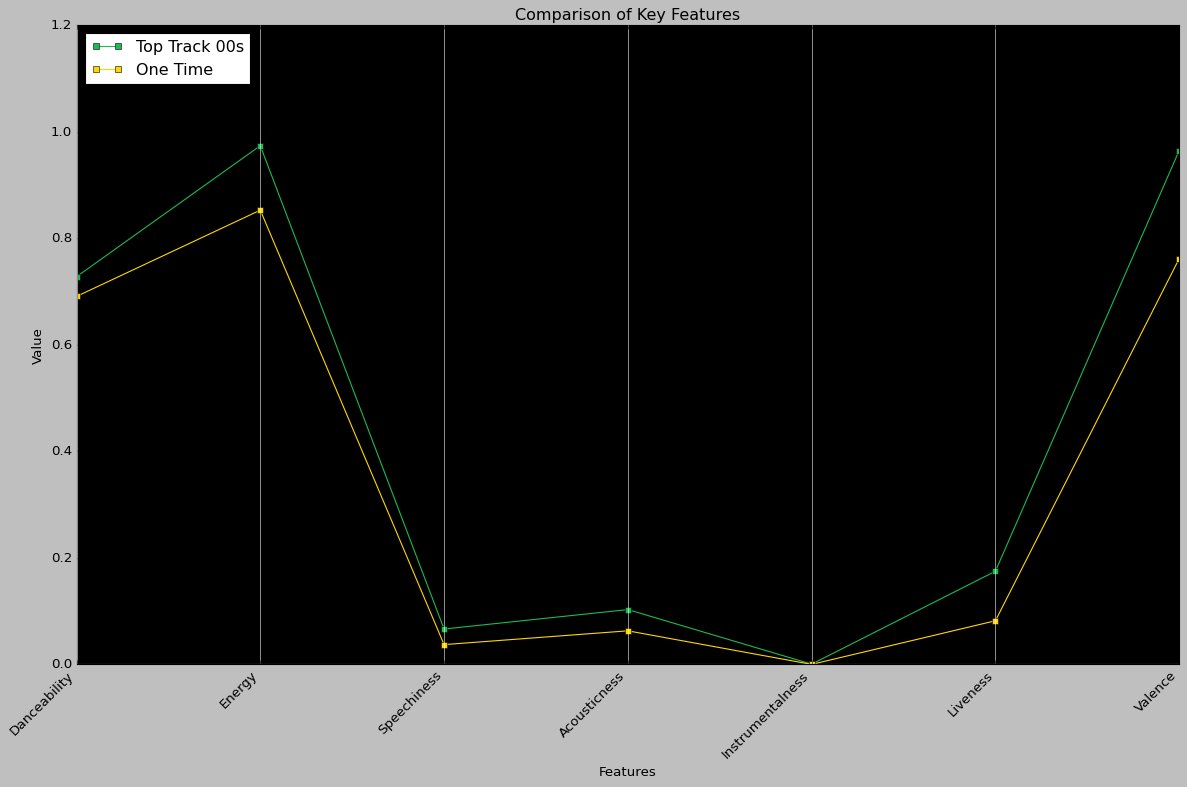

In [89]:
# Create graph
x = np.arange(len(variables))
fig, ax = plt.subplots(figsize=(15, 10))

# Plotting the lines for each song
if era == '20s':
    y_values = bts_values
    label = 'Top Track 20s'
elif era == '10s':
    y_values = uptown_values
    label = 'Top Track 10s'
elif era == '00s':
    y_values = outkast_values
    label = 'Top Track 00s'
elif era == '90s':
    y_values = houston_values
    label = 'Top Track 90s'
elif era == '80s':
    y_values = billie_jean_values
    label = 'Top Track 80s'
elif era == '70s':
    y_values = bohemian_rhapsody_values
    label = 'Top Track 70s'
elif era == '60s':
    y_values = rolling_stones_values
    label = 'Top Track 60s'

plt.plot(x, y_values, marker='s', label=label, color='#1DB954')
plt.plot(x, input_song_values, marker='s', label=track_name, color='gold')

ax.set_xlabel('Features')
ax.set_ylabel('Value')
ax.set_title('Comparison of Key Features')
ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=45, ha='right')
ax.axhline(y=0, color='white')

# Add labels to data points
def label_points(x, y, label, ax):
    #for xi, yi, l in zip(x, y, label):
        #ax.annotate(l, (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center', color='white')
        pass

label_points(x, input_song_values, input_song_values, ax)
label_points(x, y_values, [f'{label} {era}' for era in era], ax)

# Set y-axis limits
plt.ylim(0, 1.2)

# Set background color
ax.set_facecolor('black')

# Add grid lines
ax.grid(axis='x', color='white', linestyle='-', linewidth=0.5)

# Change legend position
ax.legend(loc='upper left')

# Show the graph
plt.tight_layout()
plt.show()

In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tabulate import tabulate
from colorama import Fore, Style

In [ ]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
differences = []
if era == '20s':
    reference_values = bts_values
elif era == '10s':
    reference_values = uptown_values
elif era == '00s':
    reference_values = outkast_values
elif era == '90s':
    reference_values = houston_values
elif era == '80s':
    reference_values = billie_jean_values
elif era == '70s':
    reference_values = bohemian_rhapsody_values
elif era == '60s':
    reference_values = rolling_stones_values

for feature, input_value, reference_value in zip(variables, input_song_values, reference_values):
    difference = reference_value - input_value
    differences.append([feature, difference])

In [ ]:
# Calculate the differences between input song and reference song
differences = []
for feature, input_value, reference_value in zip(variables, input_song_values, reference_values):
    difference = input_value - reference_value  # Subtract input song value from reference song value
    differences.append([feature, difference])

In [ ]:
# Table
table_headers = ["Feature", "Difference"]
table_style = "simple"

In [ ]:
# Define color formatting function
def color_format(value):
    if value > 0:
        return f"\033[32m{value}\033[0m"  # Green color for positive values
    elif value < 0:
        return f"\033[31m{value}\033[0m"  # Red color for negative values
    else:
        return str(value)

In [ ]:
# Format the differences with color
formatted_differences = [[feature, color_format(difference)] for feature, difference in differences]

In [ ]:
print(tabulate(formatted_differences, headers=table_headers, tablefmt=table_style))

Feature             Difference
----------------  ------------
Danceability          -0.083
Energy                 0.15
Speechiness            0.3862
Acousticness           0.06737
Instrumentalness       0
Liveness               0.0614
Valence               -0.187
